   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Valores nulos en cada columna:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Estadísticas descriptivas:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   73

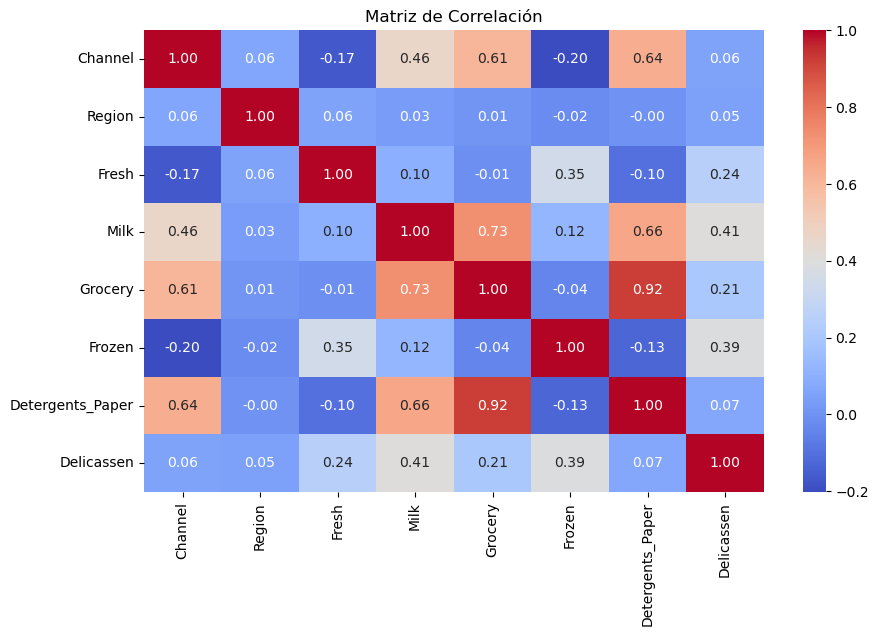

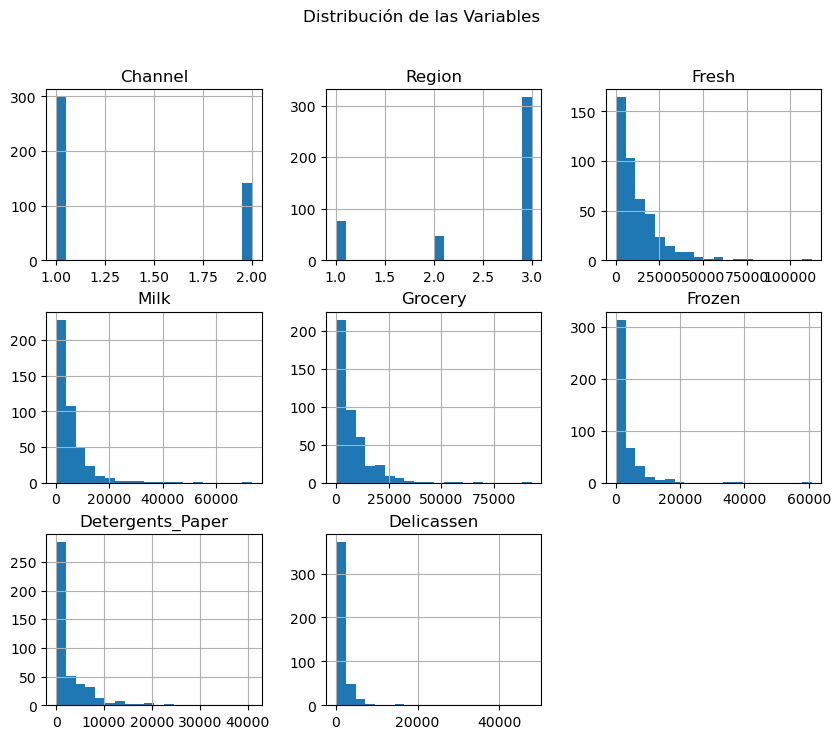

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
print(df.head())

# Revisar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())

# Estadísticas generales
print("\nEstadísticas descriptivas:")
print(df.describe())

# Matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Distribución de cada variable
df.hist(figsize=(10,8), bins=20)
plt.suptitle("Distribución de las Variables")
plt.show()


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

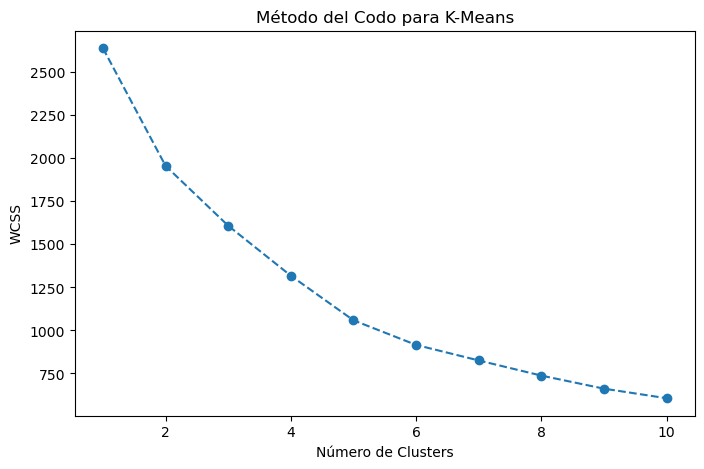

C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


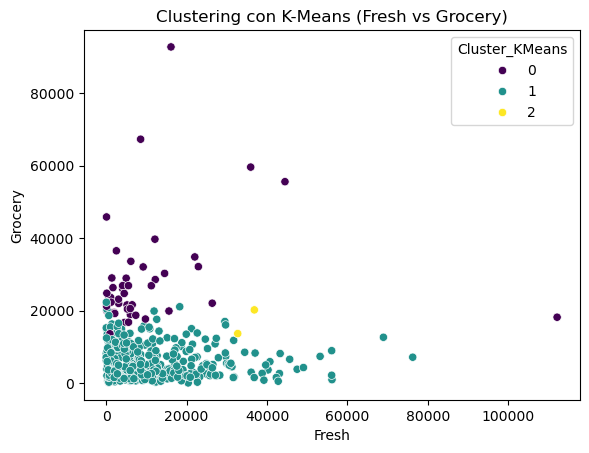

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocesamiento (normalización)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 2:])  # Excluye 'Channel' y 'Region'

# Encontrar el número óptimo de clusters con el método del "codo"
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Método del Codo para K-Means")
plt.show()

# Aplicar K-Means con 3 clusters (elige el número adecuado según el gráfico)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters con dos variables (Fresh vs Grocery)
sns.scatterplot(x=df["Fresh"], y=df["Grocery"], hue=df["Cluster_KMeans"], palette="viridis")
plt.title("Clustering con K-Means (Fresh vs Grocery)")
plt.show()


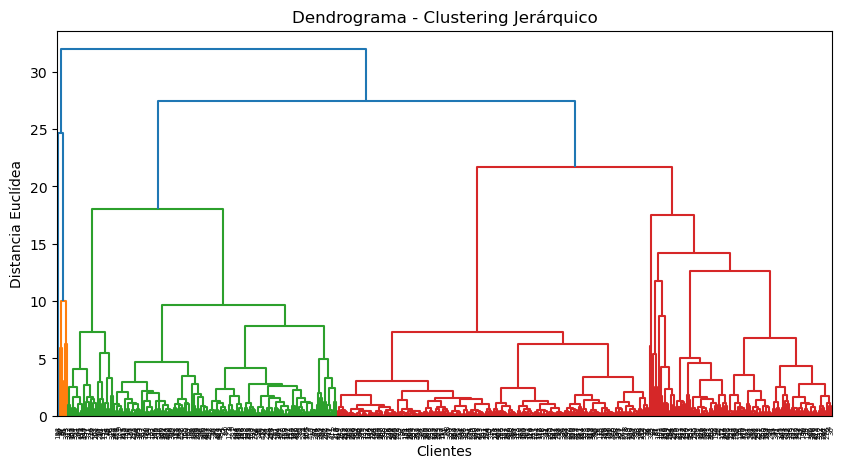

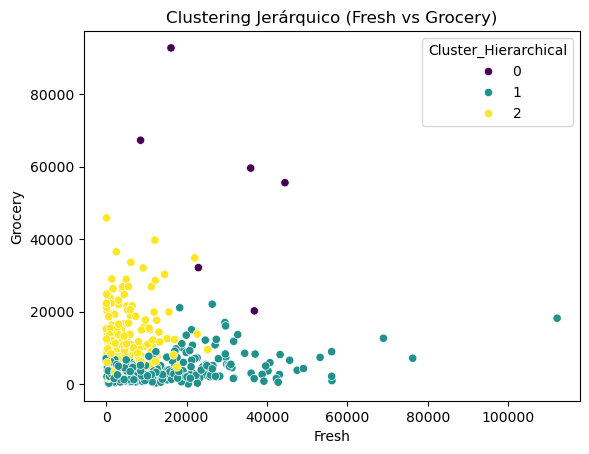

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generar el dendrograma
plt.figure(figsize=(10,5))
dendrogram(linkage(df_scaled, method='ward'))
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")
plt.show()

# Aplicar Clustering Jerárquico con 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3, linkage="ward")
df["Cluster_Hierarchical"] = hierarchical.fit_predict(df_scaled)

# Visualizar los clusters
sns.scatterplot(x=df["Fresh"], y=df["Grocery"], hue=df["Cluster_Hierarchical"], palette="viridis")
plt.title("Clustering Jerárquico (Fresh vs Grocery)")
plt.show()


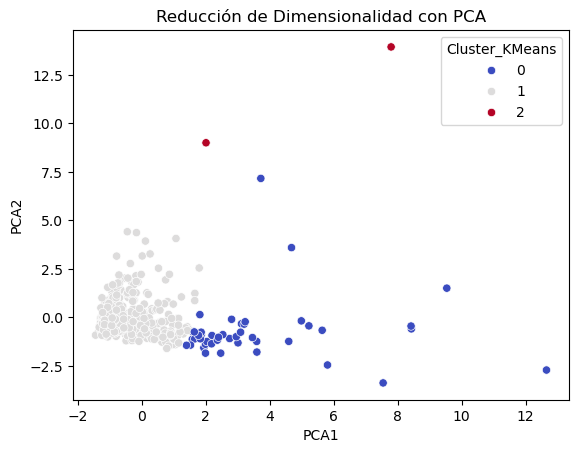

Varianza explicada por cada componente:
[0.44082893 0.283764  ]


In [7]:
from sklearn.decomposition import PCA

# Aplicar PCA reduciendo a 2 componentes principales
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Agregar los resultados al dataframe
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

# Visualizar la reducción de dimensión con los clusters de K-Means
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster_KMeans"], palette="coolwarm")
plt.title("Reducción de Dimensionalidad con PCA")
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


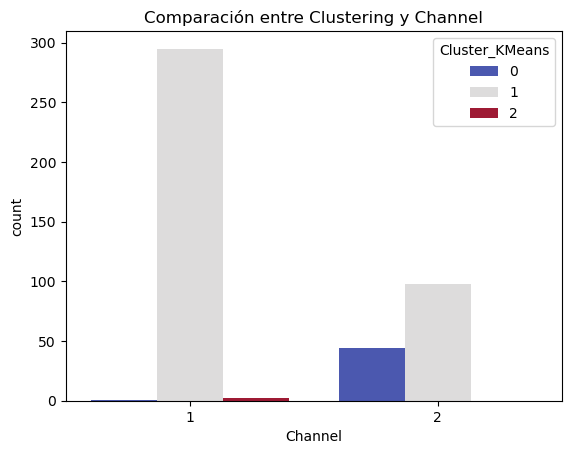

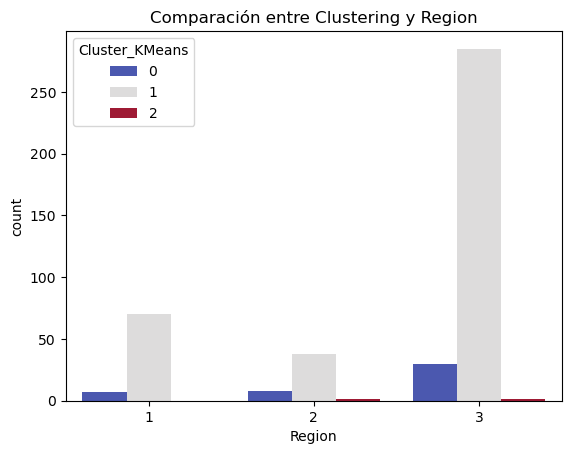

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparación entre los clusters de K-Means y la variable Channel
sns.countplot(x=df["Channel"], hue=df["Cluster_KMeans"], palette="coolwarm")
plt.title("Comparación entre Clustering y Channel")
plt.show()

# Comparación entre los clusters de K-Means y la variable Region
sns.countplot(x=df["Region"], hue=df["Cluster_KMeans"], palette="coolwarm")
plt.title("Comparación entre Clustering y Region")
plt.show()


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


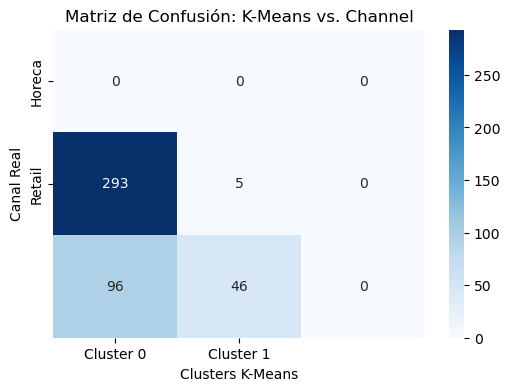

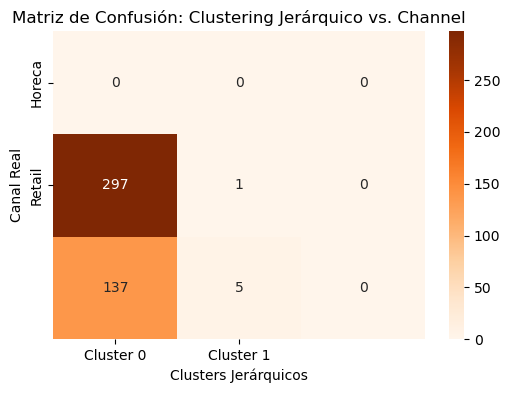


🔹 Evaluación del Clustering 🔹
ARI (Adjusted Rand Index) - K-Means: 0.2352
Homogeneidad - K-Means: 0.1554
ARI (Adjusted Rand Index) - Clustering Jerárquico: 0.0226
Homogeneidad - Clustering Jerárquico: 0.0123


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, adjusted_rand_score, homogeneity_score

# 1️⃣ Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# 2️⃣ Normalizar las variables numéricas (sin incluir Channel ni Region)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 2:])

# 3️⃣ Aplicar K-Means con 2 clusters (porque Channel tiene 2 categorías)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

# 4️⃣ Aplicar Clustering Jerárquico con 2 clusters
hierarchical = AgglomerativeClustering(n_clusters=2, linkage="ward")
df["Cluster_Hierarchical"] = hierarchical.fit_predict(df_scaled)

# 5️⃣ Convertir 'Channel' a entero para evitar problemas
df["Channel"] = df["Channel"].astype(int)

# 6️⃣ Matriz de Confusión para K-Means
conf_matrix_kmeans = confusion_matrix(df["Channel"], df["Cluster_KMeans"])
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_kmeans, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Horeca", "Retail"])
plt.xlabel("Clusters K-Means")
plt.ylabel("Canal Real")
plt.title("Matriz de Confusión: K-Means vs. Channel")
plt.show()

# 7️⃣ Matriz de Confusión para Clustering Jerárquico
conf_matrix_hierarchical = confusion_matrix(df["Channel"], df["Cluster_Hierarchical"])
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_hierarchical, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["Horeca", "Retail"])
plt.xlabel("Clusters Jerárquicos")
plt.ylabel("Canal Real")
plt.title("Matriz de Confusión: Clustering Jerárquico vs. Channel")
plt.show()

# 8️⃣ Métricas de Evaluación
ari_kmeans = adjusted_rand_score(df["Channel"], df["Cluster_KMeans"])
homogeneity_kmeans = homogeneity_score(df["Channel"], df["Cluster_KMeans"])
ari_hierarchical = adjusted_rand_score(df["Channel"], df["Cluster_Hierarchical"])
homogeneity_hierarchical = homogeneity_score(df["Channel"], df["Cluster_Hierarchical"])

# 9️⃣ Mostrar resultados
print("\n🔹 Evaluación del Clustering 🔹")
print(f"ARI (Adjusted Rand Index) - K-Means: {ari_kmeans:.4f}")
print(f"Homogeneidad - K-Means: {homogeneity_kmeans:.4f}")
print(f"ARI (Adjusted Rand Index) - Clustering Jerárquico: {ari_hierarchical:.4f}")
print(f"Homogeneidad - Clustering Jerárquico: {homogeneity_hierarchical:.4f}")


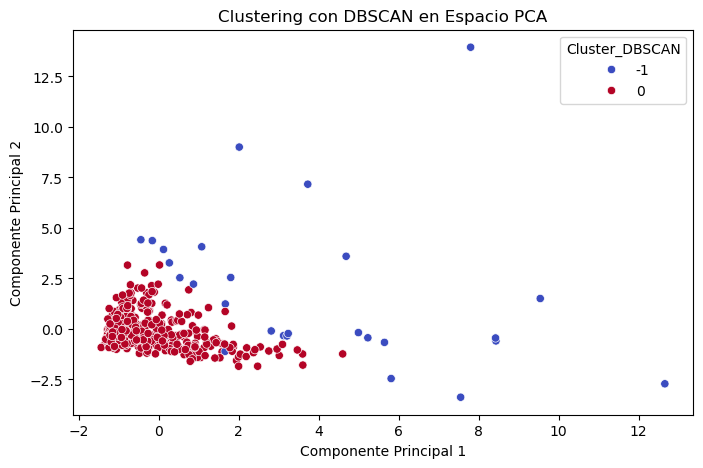


🔹 Evaluación del Clustering con DBSCAN 🔹
ARI (Adjusted Rand Index) - DBSCAN: 0.0425
Homogeneidad - DBSCAN: 0.0120


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, homogeneity_score
from sklearn.decomposition import PCA

# 1️⃣ Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# 2️⃣ Normalizar los datos (excluyendo Channel y Region)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 2:])

# 3️⃣ Aplicar DBSCAN con parámetros ajustados
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Puedes ajustar estos valores
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

# 4️⃣ Aplicar PCA para visualizar en 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

# 5️⃣ Visualización del clustering DBSCAN en PCA
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster_DBSCAN"], palette="coolwarm", legend="full")
plt.title("Clustering con DBSCAN en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# 6️⃣ Evaluación de DBSCAN con Channel
df["Channel"] = df["Channel"].astype(int)  # Asegurar que Channel sea un entero
ari_dbscan = adjusted_rand_score(df["Channel"], df["Cluster_DBSCAN"])
homogeneity_dbscan = homogeneity_score(df["Channel"], df["Cluster_DBSCAN"])

# 7️⃣ Mostrar métricas de evaluación
print("\n🔹 Evaluación del Clustering con DBSCAN 🔹")
print(f"ARI (Adjusted Rand Index) - DBSCAN: {ari_dbscan:.4f}")
print(f"Homogeneidad - DBSCAN: {homogeneity_dbscan:.4f}")


    eps  min_samples       ARI  Homogeneidad  Num Clusters
2   0.5           10  0.210658      0.278737             2
3   0.5           15  0.138565      0.255442             1
1   0.5            5  0.132860      0.098915             2
0   0.5            3  0.123656      0.103105             6
7   1.0           15  0.064122      0.017735             1
4   1.0            3  0.055966      0.022554             2
5   1.0            5  0.054753      0.014448             1
11  1.5           15  0.051334      0.015236             1
6   1.0           10  0.050577      0.012156             1
8   1.5            3  0.043059      0.027176             3
9   1.5            5  0.042487      0.011973             1
10  1.5           10  0.037257      0.009086             1
14  2.0           10  0.031630      0.009507             1
15  2.0           15  0.029030      0.007796             1
12  2.0            3  0.019620      0.004787             1
13  2.0            5  0.019620      0.004787            

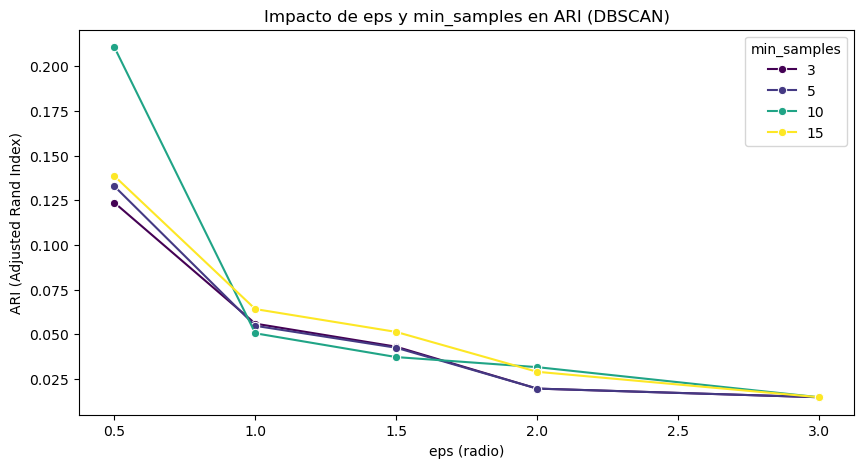

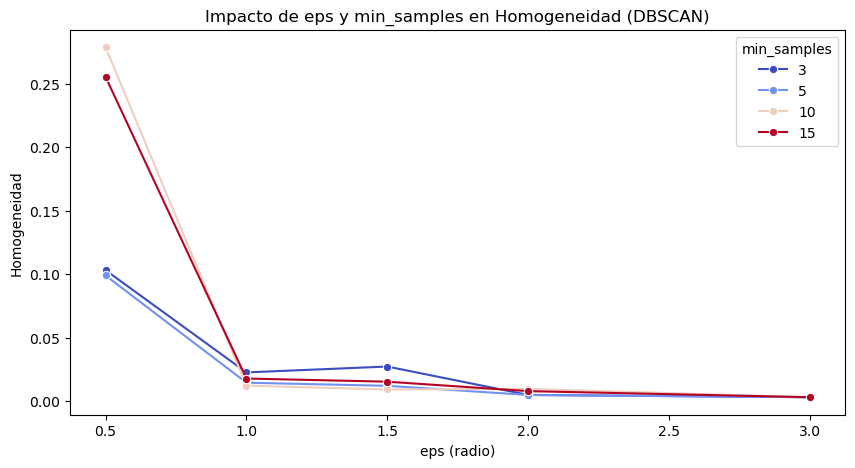

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, homogeneity_score

# Definir combinaciones de eps y min_samples
eps_values = [0.5, 1.0, 1.5, 2.0, 3.0]
min_samples_values = [3, 5, 10, 15]

# Guardar resultados
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)

        # Evaluación del clustering
        ari = adjusted_rand_score(df["Channel"], clusters)
        homogeneity = homogeneity_score(df["Channel"], clusters)
        
        # Almacenar resultados
        results.append((eps, min_samples, ari, homogeneity, len(set(clusters)) - (1 if -1 in clusters else 0)))

# Convertir resultados en DataFrame
import pandas as pd
df_results = pd.DataFrame(results, columns=["eps", "min_samples", "ARI", "Homogeneidad", "Num Clusters"])

# Mostrar resultados ordenados por ARI
df_results_sorted = df_results.sort_values(by="ARI", ascending=False)
print(df_results_sorted)

# Visualizar ARI y homogeneidad según eps
plt.figure(figsize=(10,5))
sns.lineplot(data=df_results, x="eps", y="ARI", hue="min_samples", marker="o", palette="viridis")
plt.title("Impacto de eps y min_samples en ARI (DBSCAN)")
plt.xlabel("eps (radio)")
plt.ylabel("ARI (Adjusted Rand Index)")
plt.legend(title="min_samples")
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=df_results, x="eps", y="Homogeneidad", hue="min_samples", marker="o", palette="coolwarm")
plt.title("Impacto de eps y min_samples en Homogeneidad (DBSCAN)")
plt.xlabel("eps (radio)")
plt.ylabel("Homogeneidad")
plt.legend(title="min_samples")
plt.show()


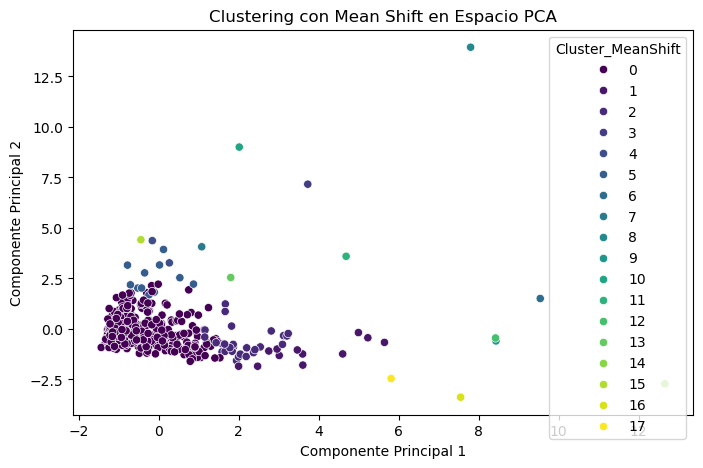


🔹 Evaluación del Clustering con Mean Shift 🔹
ARI (Adjusted Rand Index) - Mean Shift: 0.1694
Homogeneidad - Mean Shift: 0.2004
Número de clusters detectados: 18


In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import adjusted_rand_score, homogeneity_score

# 1️⃣ Estimar el mejor bandwidth automáticamente
bandwidth = estimate_bandwidth(df_scaled, quantile=0.2, n_samples=500)

# 2️⃣ Aplicar Mean Shift
mean_shift = MeanShift(bandwidth=bandwidth)
df["Cluster_MeanShift"] = mean_shift.fit_predict(df_scaled)

# 3️⃣ Visualización de clusters en PCA
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster_MeanShift"], palette="viridis", legend="full")
plt.title("Clustering con Mean Shift en Espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# 4️⃣ Evaluación con las etiquetas reales de Channel
ari_meanshift = adjusted_rand_score(df["Channel"], df["Cluster_MeanShift"])
homogeneity_meanshift = homogeneity_score(df["Channel"], df["Cluster_MeanShift"])

# 5️⃣ Mostrar resultados
print("\n🔹 Evaluación del Clustering con Mean Shift 🔹")
print(f"ARI (Adjusted Rand Index) - Mean Shift: {ari_meanshift:.4f}")
print(f"Homogeneidad - Mean Shift: {homogeneity_meanshift:.4f}")
print(f"Número de clusters detectados: {len(set(df['Cluster_MeanShift']))}")


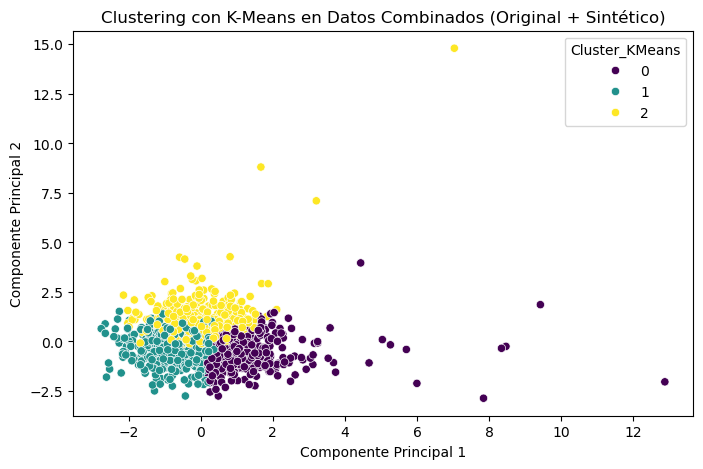

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1️⃣ Cargar el dataset original
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# 2️⃣ Generar datos sintéticos similares al dataset original
np.random.seed(42)
num_synthetic_clients = 1000

synthetic_data = {
    "Fresh": np.random.normal(loc=df["Fresh"].mean(), scale=df["Fresh"].std(), size=num_synthetic_clients),
    "Milk": np.random.normal(loc=df["Milk"].mean(), scale=df["Milk"].std(), size=num_synthetic_clients),
    "Grocery": np.random.normal(loc=df["Grocery"].mean(), scale=df["Grocery"].std(), size=num_synthetic_clients),
    "Frozen": np.random.normal(loc=df["Frozen"].mean(), scale=df["Frozen"].std(), size=num_synthetic_clients),
    "Detergents_Paper": np.random.normal(loc=df["Detergents_Paper"].mean(), scale=df["Detergents_Paper"].std(), size=num_synthetic_clients),
    "Delicassen": np.random.normal(loc=df["Delicassen"].mean(), scale=df["Delicassen"].std(), size=num_synthetic_clients)
}

# Crear DataFrame con los datos sintéticos
df_synthetic = pd.DataFrame(synthetic_data)

# 3️⃣ Unir ambos conjuntos de datos (original + sintético)
df_combined = pd.concat([df.iloc[:, 2:], df_synthetic], ignore_index=True)

# 4️⃣ Normalizar los datos combinados
scaler = StandardScaler()
df_combined_scaled = scaler.fit_transform(df_combined)

# 5️⃣ Aplicar K-Means al conjunto combinado
kmeans_combined = KMeans(n_clusters=3, random_state=42, n_init=10)
df_combined["Cluster_KMeans"] = kmeans_combined.fit_predict(df_combined_scaled)

# 6️⃣ Aplicar PCA para visualizar los clusters
pca_combined = PCA(n_components=2)
df_combined_pca = pca_combined.fit_transform(df_combined_scaled)
df_combined["PCA1"] = df_combined_pca[:, 0]
df_combined["PCA2"] = df_combined_pca[:, 1]

# 7️⃣ Visualizar la segmentación de los datos combinados
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_combined["PCA1"], y=df_combined["PCA2"], hue=df_combined["Cluster_KMeans"], palette="viridis", legend="full")
plt.title("Clustering con K-Means en Datos Combinados (Original + Sintético)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()
